# Map of CAA stations
Leg 2
Leg 3b


In [25]:
import math
import mpl_toolkits.basemap as basemap
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
def polar_stere(lon_w, lon_e, lat_s, lat_n, **kwargs):
    '''Returns a Basemap object (NPS/SPS) focused in a region.

    lon_w, lon_e, lat_s, lat_n -- Graphic limits in geographical coordinates.
                                  W and S directions are negative.
    **kwargs -- Aditional arguments for Basemap object.

    '''
    lon_0 = lon_w + (lon_e - lon_w) / 2.
    ref = lat_s if abs(lat_s) > abs(lat_n) else lat_n
    lat_0 = math.copysign(90., ref)
    proj = 'npstere' if lat_0 > 0 else 'spstere'
    prj = basemap.Basemap(projection=proj, lon_0=lon_0, lat_0=lat_0,
                          boundinglat=0, resolution='c')
    lons = [lon_w, lon_e, lon_w, lon_e, lon_0, lon_0]
    lats = [lat_s, lat_s, lat_n, lat_n, lat_s, lat_n]
    x, y = prj(lons, lats)
    ll_lon, ll_lat = prj(min(x), min(y), inverse=True)
    ur_lon, ur_lat = prj(max(x), max(y), inverse=True)
    return basemap.Basemap(projection='stere', lat_0=lat_0, lon_0=lon_0,
                           llcrnrlon=ll_lon, llcrnrlat=ll_lat,
                           urcrnrlon=ur_lon, urcrnrlat=ur_lat, **kwargs)

In [27]:
def draw_latlon_polygon(bmap, lons, lats, *args, **kwargs):
    '''Plot a polygon in lat/lon coordinates.

    bmap -- Basemap object.
    lons, lats -- Sequences of polygon vertices.
    *args, **kwargs -- Aditional arguments to pyplot.plot().

    You should use 'k-' in *args to draw the lines in color black.

    '''
    if len(lons) != len(lats):
        raise IndexError('lons and lats have different lenghts')
    if lons[-1] != lons[0] or lats[-1] != lats[0]:
        lons = np.concatenate((lons, lons[:1]))
        lats = np.concatenate((lats, lats[:1]))
    n = len(lons) - 1
    res = 10000
    for i in range(n):
        x = np.linspace(lons[i], lons[i + 1], res)
        y = np.linspace(lats[i], lats[i + 1], res)
        x, y = bmap(x, y)
        bmap.plot(x, y, *args, **kwargs)

Stations leg 2 with nitrate data:

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


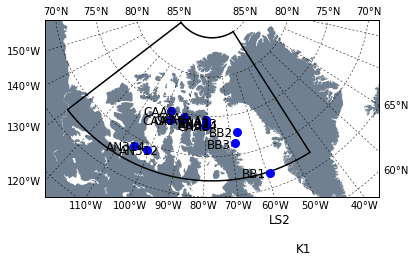

In [28]:
nps = polar_stere(-135, -20, 65, 85, resolution='l')
nps.drawmapboundary(fill_color='white')
nps.fillcontinents(color='slategray', lake_color='white')
mer = np.arange(-150, 120, 10.)
par = np.arange(0, 90, 5.)
nps.drawparallels(par, linewidth=0.5, labels=[False, True, True, False])#, dashes=[1, 5])
nps.drawmeridians(mer, linewidth=0.5, labels=[True, False, False, True])#, dashes=[1, 5])
draw_latlon_polygon(nps, [-130, -130, -45, -45], [67, 85, 85, 67], 'k-')

#coordinates for stations:
# order - K1, LS2, BB1, BB2, BB3, CAA1, CAA2, AN323, AN324, CAA3, CAA4, CAA5, CAA6, CAA7, AN312, AN314
labels = ['K1', 'LS2', 'BB1', 'BB2','BB3', 'CAA1','CAA2','CAA3','CAA4','CAA5','CAA6','CAA7',\
          'AN312','AN314','AN323','AN324']
lat_sta = [56.122, 60.454, 66.857683, 72.7495, 71.4091, 74.5214, 74.3209, 73.8155,74.5388, 74.1210,74.7596,73.6729 \
           ,69.1649, 68.9689, 74.1580, 73.9815] # degrees North
lon_sta = [-53.374, -56.550, -59.06315, -66.9867, -68.5960, -80.5621, -80.4957, -80.4875, -90.8045, -91.5118, -97.4522, -96.5238 \
          , -100.6967, -105.4616, -80.4721, -80.4654] # degrees East

x, y = nps(lon_sta, lat_sta)
nps.plot(x, y, 'bo', markersize=8)
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt-8000*50, ypt-60000, label, fontsize=12)

Stations leg 3b with Nitrate data:

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


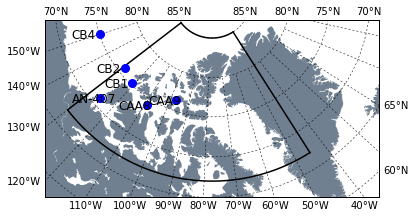

In [29]:
nps = polar_stere(-135, -20, 65, 85, resolution='l')
nps.drawmapboundary(fill_color='white')
nps.fillcontinents(color='slategray', lake_color='white')
mer = np.arange(-150, 120, 10.)
par = np.arange(0, 90, 5.)
nps.drawparallels(par, linewidth=0.5, labels=[False, True, True, False])#, dashes=[1, 5])
nps.drawmeridians(mer, linewidth=0.5, labels=[True, False, False, True])#, dashes=[1, 5])
draw_latlon_polygon(nps, [-130, -130, -45, -45], [67, 85, 85, 67], 'k-')

#coordinates for stations:
labels = ['CB1','CB2','CB4','AN-407','CAA8','CAA9']
lat_sta = [75.212, 75.808, 74.9998, 71.0055, 74.1391, 76.3326] # degrees North
lon_sta = [-121, -129, -150, -126, -109, -97] # degrees East

x, y = nps(lon_sta, lat_sta)
nps.plot(x, y, 'bo', markersize=8)
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt-8000*50, ypt-60000, label, fontsize=12)

Stations Manuel:

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


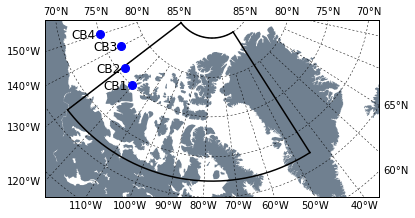

In [30]:
nps = polar_stere(-135, -20, 65, 85, resolution='l')
nps.drawmapboundary(fill_color='white')
nps.fillcontinents(color='slategray', lake_color='white')
mer = np.arange(-150, 120, 10.)
par = np.arange(0, 90, 5.)
nps.drawparallels(par, linewidth=0.5, labels=[False, True, True, False])#, dashes=[1, 5])
nps.drawmeridians(mer, linewidth=0.5, labels=[True, False, False, True])#, dashes=[1, 5])
draw_latlon_polygon(nps, [-130, -130, -45, -45], [67, 85, 85, 67], 'k-')

#coordinates for stations:
# order - CB-1, CB-2, CB-3, CB-4
lat_sta = [75.01, 75.81, 76.98, 74.99] # degrees North
lon_sta = [-120.64, -129.21, -140.03, -150.01] # degrees East
x, y = nps(lon_sta, lat_sta)
nps.plot(x, y, 'bo', markersize=8)

labels = ['CB1', 'CB2', 'CB3', 'CB4']
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt-8000*50, ypt-60000, label, fontsize=12)

plt.show()

--> CB1 & CB2 have dissolved manganese and nitrate data currently; can be used to derive relation for biology

# Load nitrate data

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [32]:
f1 = 'CB1_nitrate.csv'
f2 = 'CB2_nitrate.csv'

In [33]:
def read_csv(filename):
    ifile = open(filename,'rt', encoding='UTF8')
    CB_data = csv.reader(ifile)
    
    depth = []
    NO3 = []
    
    i = 0
    for row in CB_data:
        i += 1
        if i < 2:
            i == 1
        else:
            depth.append(float(row[4]))
            NO3.append(float(row[6]))
    return depth, NO3

dN1, CB1_NO3 = read_csv(f1)
dN2, CB2_NO3 = read_csv(f2)

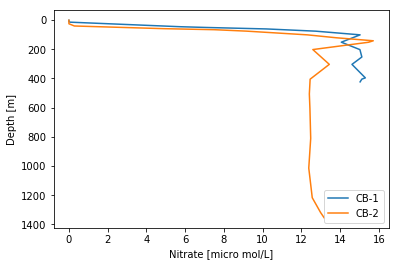

In [34]:
# plot concentrations:
# Nitrate
plt.figure(1)
plt.gca().invert_yaxis()
plt.plot(CB1_NO3, dN1, label='CB-1')
plt.plot(CB2_NO3, dN2, label='CB-2')
plt.xlabel('Nitrate [micro mol/L]')
plt.ylabel('Depth [m]')
#plt.ylim(500, 0)
plt.legend(loc=4)
plt.show()

# Load mangenese data

In [37]:
f1 = 'CB1_Manuel_data.csv'
f2 = 'CB2_Manuel_data.csv'

def read_tracers(filename):
    ifile = open(filename,'rt', encoding='UTF8')
    CB_data = csv.reader(ifile)
    
    depth = []
    Mn_avg = []
    
    i = 0
    for row in CB_data:
        i += 1
        if i < 2:
            i == 1
        else:
            depth.append(float(row[0]))
            Mn_avg.append(float(row[3]))
    return depth, Mn_avg

dM1, CB1_Mn = read_tracers(f1)
CB1_Mn = [0.001 * e for e in CB1_Mn]
dM2, CB2_Mn = read_tracers(f2)
CB2_Mn = [0.001 * e for e in CB2_Mn]

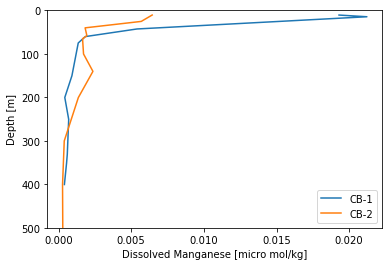

In [38]:
# plot concentrations:
# Manganese:
plt.figure(1)
plt.gca().invert_yaxis()
plt.plot(CB1_Mn, dM1, label='CB-1')
plt.plot(CB2_Mn, dM2, label='CB-2')
plt.xlabel('Dissolved Manganese [micro mol/kg]')
plt.ylabel('Depth [m]')
plt.ylim(500, 0)
plt.legend(loc=4)
plt.show()

# Linear fit of Nitrate to Mn

In [39]:
from scipy import stats

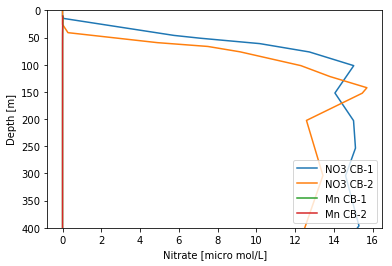

In [40]:
# plot concentrations:
# Nitrate
plt.figure(1)
plt.gca().invert_yaxis()
plt.plot(CB1_NO3, dN1, label='NO3 CB-1')
plt.plot(CB2_NO3, dN2, label='NO3 CB-2')
plt.plot(CB1_Mn, dM1, label='Mn CB-1')
plt.plot(CB2_Mn, dM2, label='Mn CB-2')
plt.xlabel('Nitrate [micro mol/L]')
plt.ylabel('Depth [m]')
plt.ylim(400, 0)
plt.legend(loc=4)
plt.show()

In [41]:
# First: need to interpolate NO3 and Mn to be at regular depths to be fit with a linear regression
from scipy.interpolate import interp1d

fN1 = interp1d(dN1,CB1_NO3)
fN2 = interp1d(dN2,CB2_NO3)
fMn1 = interp1d(dM1,CB1_Mn)
fMn2 = interp1d(dM2,CB2_Mn)

d_interp = 400 # interpolation depth
depths = np.linspace(11,d_interp, num=20, endpoint=True)

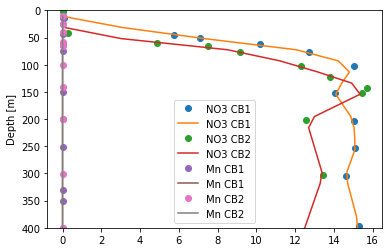

In [42]:
# plot interpolation
plt.gca().invert_yaxis()
plt.plot(CB1_NO3, dN1, 'o', fN1(depths), depths, '-',label='NO3 CB1')
plt.plot(CB2_NO3, dN2, 'o', fN2(depths), depths, '-',label='NO3 CB2')
plt.plot(CB1_Mn, dM1, 'o', fMn1(depths), depths, '-',label='Mn CB1')
plt.plot(CB2_Mn, dM2, 'o', fMn2(depths), depths, '-',label='Mn CB2')
plt.ylabel('Depth [m]')
plt.ylim(d_interp,0)
plt.legend()
plt.show()

In [43]:
# Linear regressions:

#CB1
NO31 = fN1(depths)
Mn1 = fMn1(depths)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(NO31,Mn1)

#CB2
NO32 = fN2(depths)
Mn2 = fMn2(depths)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(NO32,Mn2)

In [44]:
r_value1**2, r_value2**2, slope1, intercept1

(0.90470157171715659,
 0.55927844267531812,
 -0.0010445293937863876,
 0.015901273125298623)

In [45]:
min(NO31), max(NO31)

(0.0041131351869606852, 15.224406268136971)

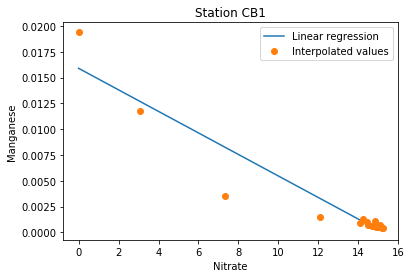

In [46]:
# Plot linear regression
# CB1:
NO3_regr = np.linspace(0,15, num=20, endpoint=True)
Mn_regr = NO3_regr*slope1 + intercept1
plt.plot(NO3_regr, Mn_regr, label='Linear regression')
plt.plot(NO31, Mn1,'o', label='Interpolated values')
plt.xlabel('Nitrate')
plt.ylabel('Manganese')
plt.title('Station CB1')
plt.legend()
plt.show()

oddities seem to be from values nearer to the surface.

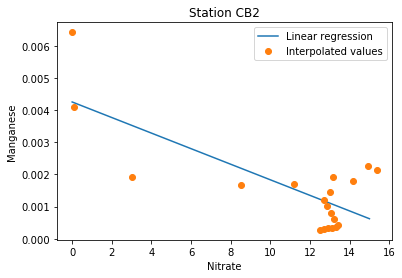

In [47]:
# Plot linear regression
# CB2:
NO3_regr = np.linspace(0,15, num=20, endpoint=True)
Mn_regr = NO3_regr*slope2 + intercept2
plt.plot(NO3_regr, Mn_regr, label='Linear regression')
plt.plot(NO32, Mn2,'o', label='Interpolated values')
plt.xlabel('Nitrate')
plt.ylabel('Manganese')
plt.title('Station CB2')
plt.legend()
plt.show()

Very poor fit...

# Linear fit with surface and deep seperated
Surface = 11 - 100 m 

Deep = 100 - 400 m

In [48]:
# Linear regressions:

#CB1
NO31 = fN1(depths)
Mn1 = fMn1(depths)
slope1_surf, intercept1_surf, r_value1_surf, p_value1_surf, std_err1_surf = stats.linregress(NO31,Mn1)
slope1_deep, intercept1_deep, r_value1_deep, p_value1_deep, std_err1_deep = stats.linregress(NO31,Mn1)

#CB2
NO32 = fN2(depths)
Mn2 = fMn2(depths)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(NO32,Mn2)

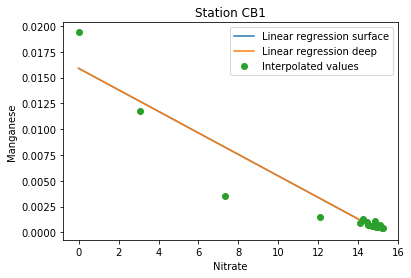

In [49]:
# Plot linear regression
# CB1:
NO3_regr_surf = np.linspace(0,15, num=20, endpoint=True)
NO3_regr_deep = np.linspace(0,15, num=20, endpoint=True)
Mn_regr_surf = NO3_regr_surf*slope1_surf + intercept1_surf
Mn_regr_deep = NO3_regr_deep*slope1_deep + intercept1_deep

plt.plot(NO3_regr_surf, Mn_regr_surf, label='Linear regression surface')
plt.plot(NO3_regr_deep, Mn_regr_deep, label='Linear regression deep')
plt.plot(NO31, Mn1,'o', label='Interpolated values')
plt.xlabel('Nitrate')
plt.ylabel('Manganese')
plt.title('Station CB1')
plt.legend()
plt.show()